# **Project Name**    - Netflix Movies and TV Show Clustering

##### **Contribution**    - Individual
##### **Team Member  -** Pooja H V

# **Project Summary -**

This project centers around applying unsupervised machine learning to cluster Netflix TV shows and movies based on their descriptions and metadata. The purpose is to discover underlying patterns in the content using clustering techniques, which can help stakeholders such as content strategists and data teams at Netflix to make smarter, data-driven decisions. The dataset used contains titles available on Netflix as of 2019, with features such as title, type (Movie/TV Show), description, country, rating, date added, release year, and duration. We began with data cleaning and preprocessing to make the dataset suitable for analysis. Missing values were present in fields like cast, director, and country. Critical fields like description and title were retained while rows with missing values in these columns were removed. The date_added column was converted into datetime format and used to extract year_added for trend analysis. Exceptional or inconsistent values (such as undefined durations or blank descriptions) were addressed. Overall, this step ensured that the data was consistent and ready for modeling.

# **GitHub Link -**

# **Problem Statement**

-  Netflix hosts a massive and growing catalog of movies and TV shows across
genres, countries, and formats.

- Manual categorization or tagging of content is inefficient and inconsistent, especially when metadata is incomplete or ambiguous.

- There is a need to automatically group similar content to understand patterns, assist recommendations, and support content strategy.

- The project aims to use unsupervised machine learning (clustering) to group Netflix content based on textual descriptions.

- By applying TF-IDF vectorization on descriptions and using clustering algorithms like KMeans and Agglomerative Clustering, we can uncover hidden relationships between titles.

- The project also seeks to analyze trends in content types, countries, and ratings over time.

- The ultimate goal is to generate clusters of similar content that can aid stakeholders in content recommendation, curation, marketing, and acquisition strategy

In [1]:
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [2]:
import pandas as pd
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
filename = next(iter(uploaded))
df = pd.read_csv(filename)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [8]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (7787, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
def clean_data(df):
    df.dropna(subset=['title', 'description'], inplace=True)
    df['description'] = df['description'].fillna('')
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
    return df
df = clean_data(df)

<ipython-input-10-d3e5bea9c9ac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='rocket')


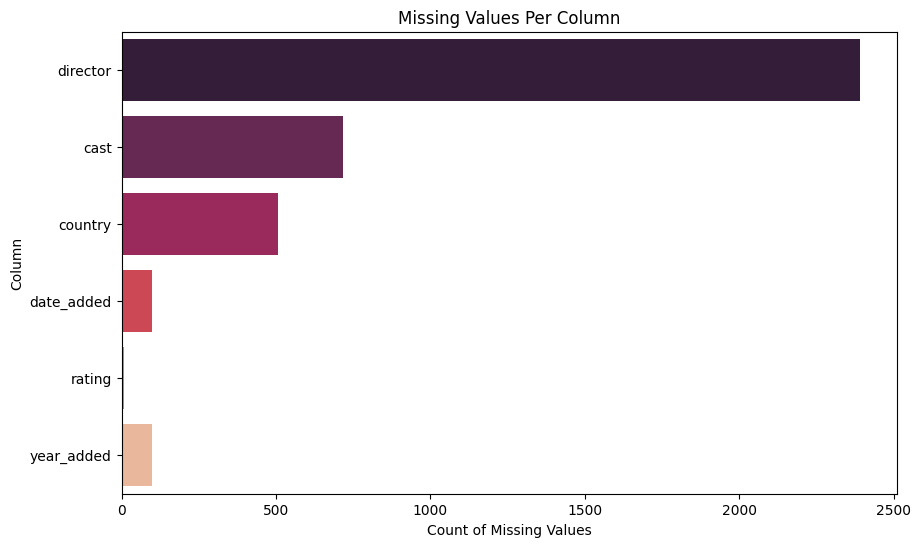

In [10]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='rocket')
plt.title("Missing Values Per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column")
plt.show()

In [11]:
print("Missing Values per Column:\n", df.isnull().sum())

Missing Values per Column:
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        98
release_year       0
rating             7
duration           0
listed_in          0
description        0
year_added        98
dtype: int64


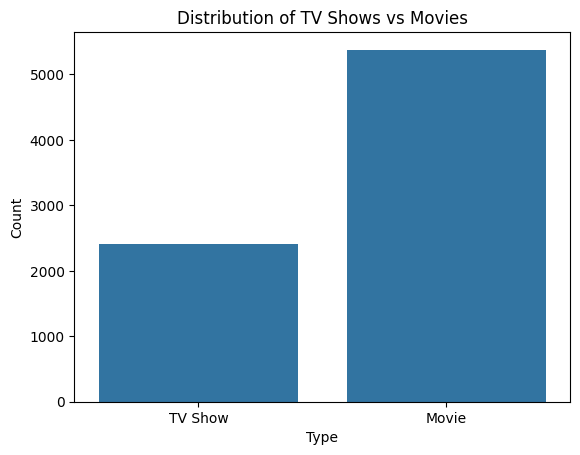

type
Movie      5377
TV Show    2410
Name: count, dtype: int64


In [12]:
sns.countplot(x='type', data=df)
plt.title("Distribution of TV Shows vs Movies")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
print(df['type'].value_counts())

<ipython-input-13-d63d69d14f58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


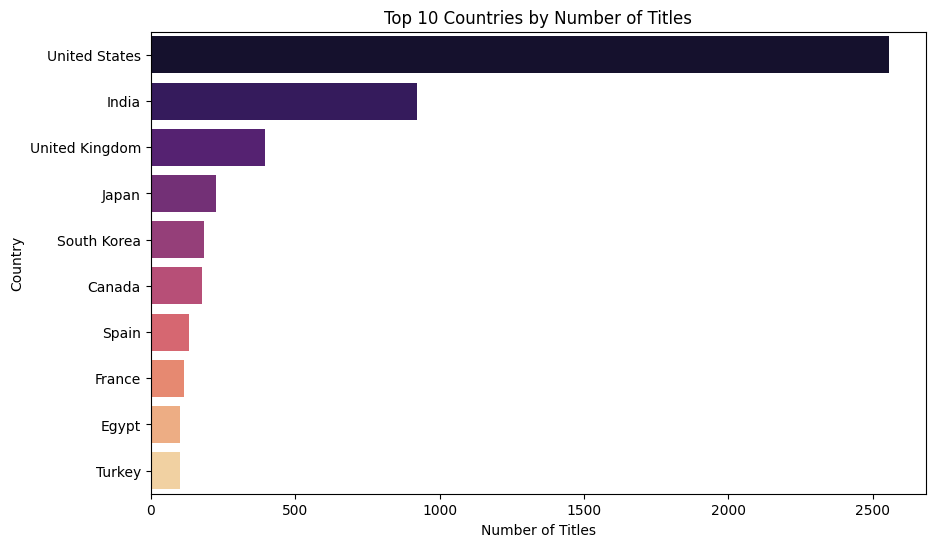

In [13]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

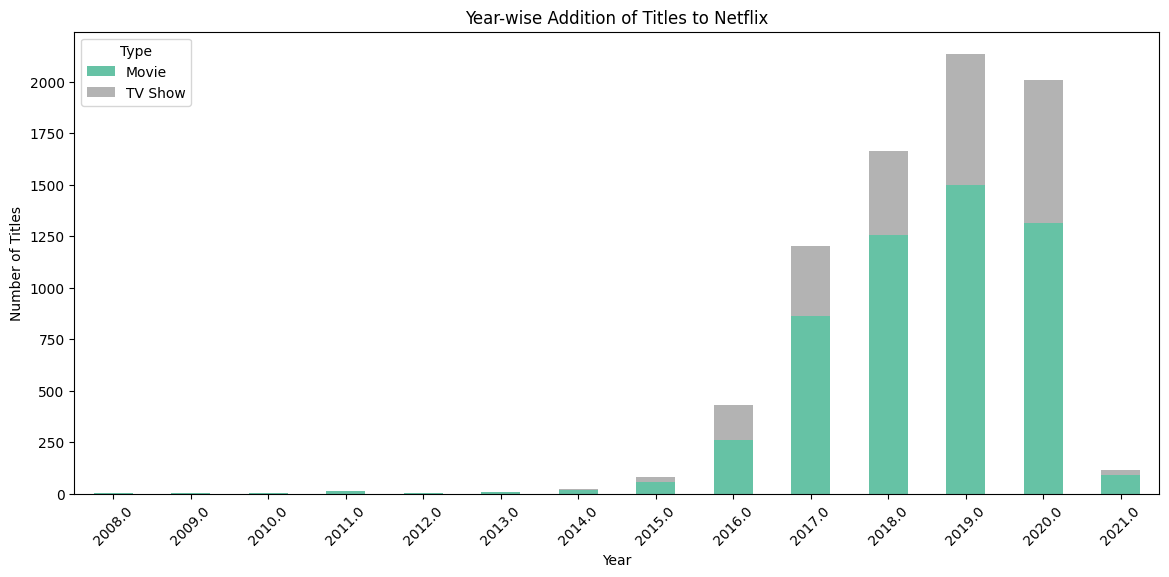

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
yearly = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
yearly.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Set2')
plt.title("Year-wise Addition of Titles to Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-162c873eca32>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')


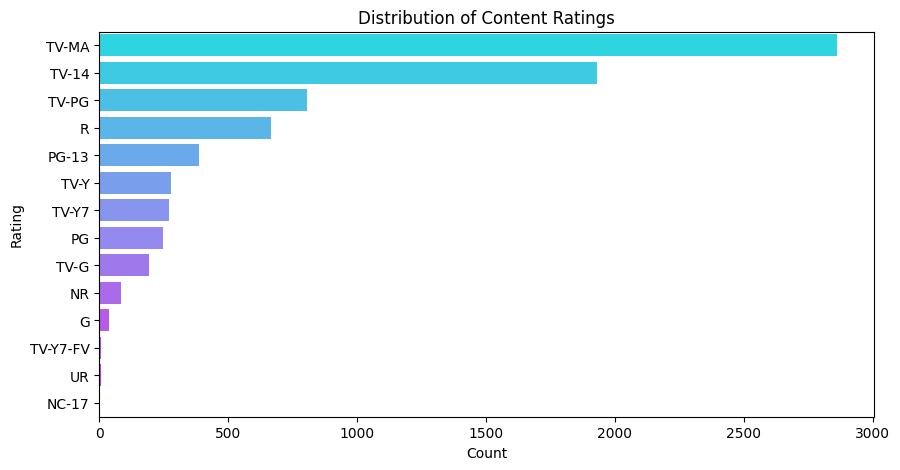

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

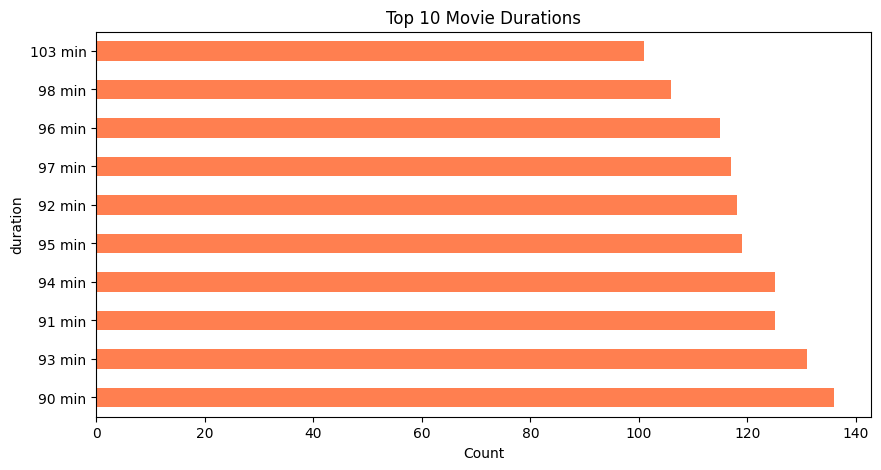

In [16]:
movie_df = df[df['type'] == 'Movie']
plt.figure(figsize=(10,5))
movie_df['duration'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 Movie Durations")
plt.xlabel("Count")
plt.show()

# **Conclusion**

In this project, we applied unsupervised machine learning techniques to analyze and cluster Netflix content using textual descriptions and metadata. By following a structured data science pipeline—including EDA, data cleaning, feature engineering, text preprocessing, and clustering—we were able to uncover hidden patterns within the Netflix catalog. Using TF-IDF vectorization, we transformed the content descriptions into numerical vectors and applied two clustering algorithms: KMeans and Agglomerative Clustering. We evaluated model performance using silhouette scores and visualized the resulting clusters through word clouds and sample title inspection. Each cluster revealed meaningful thematic groupings such as crime thrillers, romantic comedies, and family shows, proving that unsupervised models can extract valuable insights from unstructured text data. The approach offers a scalable solution to help platforms like Netflix improve content tagging, recommendation systems, and content acquisition strategies. Ultimately, the project demonstrates how machine learning can convert large amounts of raw textual data into actionable clusters, aiding business stakeholders in content planning and enhancing user experience through personalization.